# Validation Metrics
Choosing the correct metric to judge our model is often one of the most important steps in running any machine learning experiment.

In [25]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter

## Balanced Classes
Let's take a look at some evaluation metrics when we have an even split between ground truth labels. We call this balanced classes. For our predictions, let's assume that our classifier gives everything a positive label.

In [26]:
balanced = np.concatenate([np.zeros(50),np.ones(50)]).astype(int)
pred = np.ones(100).astype(int)

In [27]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
c_pred = Counter(pred)
print "Predicted:    0s: {:2}, 1s: {:2}".format(c_pred[0],c_pred[1])
c_true = Counter(balanced)
print "Ground truth: 0s: {:2}, 1s: {:2}".format(c_true[0],c_true[1])

Predicted:    0s:  0, 1s: 100
Ground truth: 0s: 50, 1s: 50


In [29]:
print "Accuracy:",metrics.accuracy_score(pred,balanced)
print "F1 score:",metrics.f1_score(pred,balanced)
print "Precision:", metrics.precision_score(pred,balanced)
print "Recall:",metrics.recall_score(pred,balanced)

Accuracy: 0.5
F1 score: 0.666666666667
Precision: 1.0
Recall: 0.5


Notice that the accuracy reflects our intuition (at least mine). We know we got half the predictions wrong, so our accuracy is 50%. Precision is 1 because for each ground truth 1, we correctly guessed it as 1. Recall is .5 because we were too zealous with our positive labels.

Now for fun let's look at AUROC score

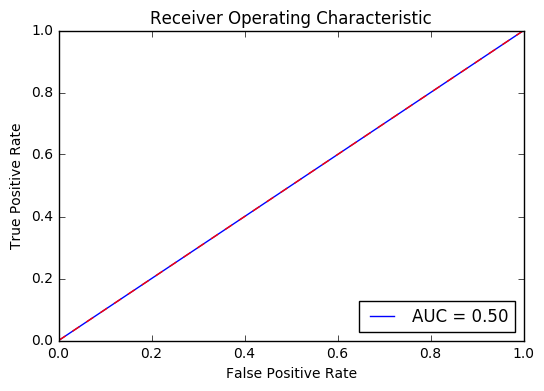

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(balanced,pred)
roc_auc = metrics.auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {:0.2f}'.format( roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Unbalanced Classes
Unbalanced classes occur when there is more of one label than the other(s).

Let's see if our evaluation metrics match our intuitions in this case.

In [31]:
unbalanced = np.concatenate([np.zeros(90),np.ones(10)]).astype(int)
pred = np.concatenate([np.zeros(99),np.ones(1)]).astype(int)
c_pred = Counter(pred)
print "Predicted: 0s: {}, 1s: {}:".format(c_pred[0],c_pred[1])
c_true = Counter(unbalanced)
print "Ground truth: 0s: {}, 1s: {}:".format(c_true[0],c_true[1])

Predicted: 0s: 99, 1s: 1:
Ground truth: 0s: 90, 1s: 10:


Here will make 90% of our data the negative label, with only 10% being positive. Perhaps the positive label represents cases of fraud at a bank.

In [32]:
print "Accuracy:",metrics.accuracy_score(pred,unbalanced)
print "F1 score:",metrics.f1_score(pred,unbalanced)
print "Precision:", metrics.precision_score(pred,unbalanced)
print "Recall:",metrics.recall_score(pred,unbalanced)

Accuracy: 0.91
F1 score: 0.181818181818
Precision: 0.1
Recall: 1.0


Is this the outcome we wanted? We only correctly guessed 1/10 cases of fraud, but our accuracy is over 90%.
 **Accuracy is misleading in unbalanced classification problems.** In this case, precision is a much better metric of how our classifier is performing.

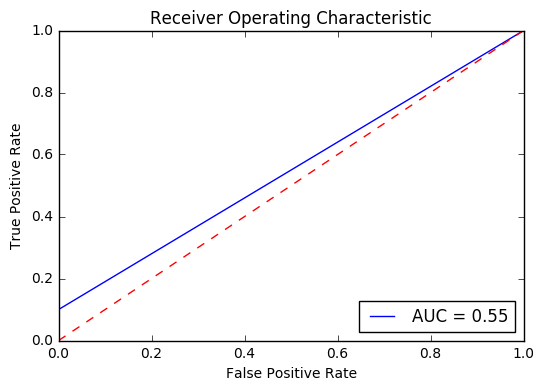

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(unbalanced,pred)
roc_auc = metrics.auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {:0.2f}'.format( roc_auc))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()